In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import pylab as plt

In [2]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [3]:
# Fitness function 
# particle [learning rate, number of layer, activation]

def getvalacc(particle):
  actfun= ['sigmoid', 'tanh', 'relu', 'elu']
  model = Sequential()
  node = 32
  model.add(Dense(32, activation=actfun[int(particle[2])], input_shape=(784,)))
  for i in range(int(particle[1]-1)):
    model.add(Dense(32, activation=actfun[int(particle[2])]))
  
  model.add(Dense(num_classes, activation='softmax'))
  print(model.summary())

  model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=particle[0]),
              metrics=['accuracy'])
  history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1)
  score = model.evaluate(x_test, y_test, verbose=0)
  return score[1]

In [4]:
## how to use this fitness function
#[learning rate, number of layer, activation]
print(getvalacc([0.001, 5, 2]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 29,674
Trainable params: 29,674
Non-traina

In [5]:
from __future__ import division
import random
import math

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i > self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print ('FINAL:')
        print (pos_best_g)
        print (err_best_g)

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

initial=[0.001, 5, 2,32]             # initial starting location [x1,x2...]
bounds=[(0.001,0.1),(1,10),(0,2),(32,1024)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(getvalacc,initial,bounds,num_particles=3,maxiter=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 29,674
Trainable params: 29,674
Non-trai

In [6]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


In [7]:
# Fitness function
# We assume the problem can be expressed by the following equation: 
# f(x1,x2)=(x1+2*-x2+3)^2 + (2*x1+x2-8)^2
# The objective is to find a minimum which is 0

def fitness_function(x1,x2):
  f1=x1+2*-x2+3
  f2=2*x1+x2-8
  z = f1**2+f2**2
  return z

In [8]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
  # Initialise new velocity array
  num_particle = len(particle)
  new_velocity = np.array([0.0 for i in range(num_particle)])
  # Randomly generate r1, r2 and inertia weight from normal distribution
  r1 = random.uniform(0,max)
  r2 = random.uniform(0,max)
  w = random.uniform(w_min,max)
  c1 = c
  c2 = c
  # Calculate new velocity
  for i in range(num_particle):
    new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity

In [9]:
def update_position(particle, velocity):
  # Move particles by adding velocity
  new_particle = particle + velocity
  return new_particle

In [10]:
def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
  # Initialisation
  
  # Population
  particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Particle's best position
  pbest_position = particles
  # Fitness
  pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
  # Index of the best particle
  gbest_index = np.argmin(pbest_fitness)
  # Global best particle position
  gbest_position = pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity = [[0.0 for j in range(dimension)] for i in range(population)]
  images = []
  # Loop for the number of generation
  for t in range(generation):
    # Stop if the average fitness value reached a predefined success criterion
    if np.average(pbest_fitness) <= fitness_criterion:
      break
    else:
      for n in range(population):
        # Update the velocity of each particle
        velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
        # Move the particles to new position
        particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
    # Find the index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]
    
    
  # Print the results
  print('Global Best Position: ', gbest_position)
  print('Best Fitness Value: ', min(pbest_fitness))
  print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
  print('Number of Generation: ', t)
  

In [11]:

pso_2d(population = 200, dimension = 2, position_min = -100.0, position_max = 100.0, generation = 400, fitness_criterion = 10e-4)

Global Best Position:  [2.60007112 2.80003775]
Best Fitness Value:  3.241329766008653e-08
Average Particle Best Fitness Value:  0.0008932809749559803
Number of Generation:  68


In [12]:
def pso_2dWI(population, dimension, position_min, position_max, generation, fitness_criterion):
  # Initialisation
  # Plotting prepartion
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  x = np.linspace(position_min, position_max, 80)
  y = np.linspace(position_min, position_max, 80)
  X, Y = np.meshgrid(x, y)
  Z= fitness_function(X,Y)
  ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)
  # Population
  particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Particle's best position
  pbest_position = particles
  # Fitness
  pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
  # Index of the best particle
  gbest_index = np.argmin(pbest_fitness)
  # Global best particle position
  gbest_position = pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity = [[0.0 for j in range(dimension)] for i in range(population)]
  images = []
  # Loop for the number of generation
  for t in range(generation):
    # Stop if the average fitness value reached a predefined success criterion
    if np.average(pbest_fitness) <= fitness_criterion:
      break
    else:
      for n in range(population):
        # Update the velocity of each particle
        velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
        # Move the particles to new position
        particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
    # Find the index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]
    
    image = ax.scatter3D([
                          particles[n][0] for n in range(population)],
                         [particles[n][1] for n in range(population)],
                         [fitness_function(particles[n][0],particles[n][1]) for n in range(population)], c='b')
    images.append([image])

  animated_image = animation.ArtistAnimation(fig, images)
  animated_image.save('./pso_simple.gif', writer='pillow')
  # Print the results
  print('Global Best Position: ', gbest_position)
  print('Best Fitness Value: ', min(pbest_fitness))
  print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
  print('Number of Generation: ', t)
  

Global Best Position:  [2.60003992 2.79995863]
Best Fitness Value:  1.652525999746894e-08
Average Particle Best Fitness Value:  0.0009290967666720867
Number of Generation:  67


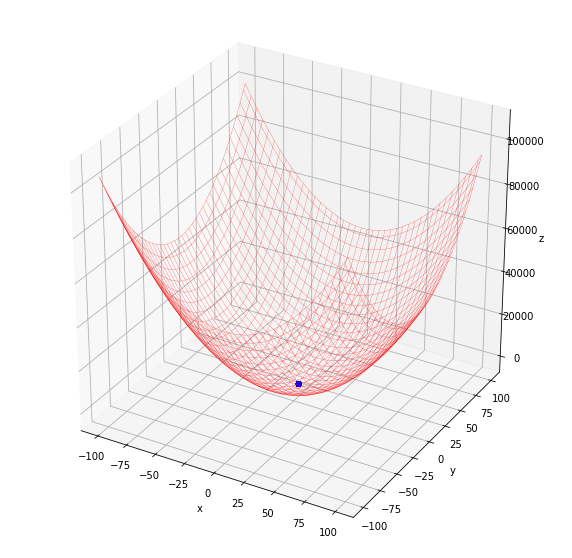

In [13]:

pso_2dWI(population = 200, dimension = 2, position_min = -100.0, position_max = 100.0, generation = 400, fitness_criterion = 10e-4)